In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                    [8.9], [5.2], [8.59], [2.1], [8],
                    [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)                                        

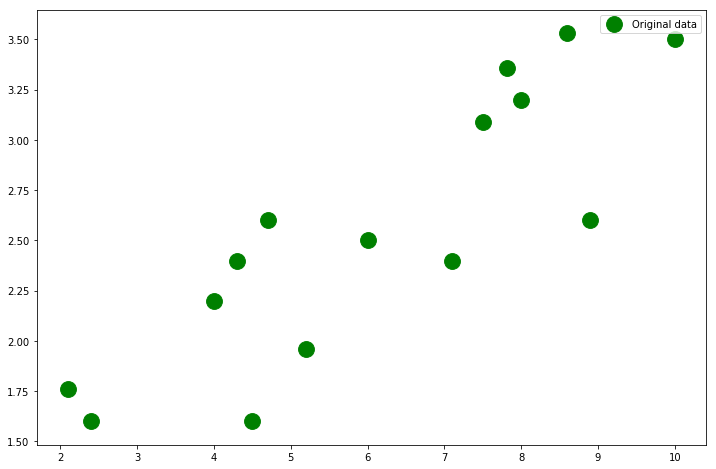

In [69]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [0]:
import torch

In [71]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [0]:
input_size = 1
hidden_size = 1
output_size = 1

w1 contains the weights to our neural network

In [73]:
w1 = torch.rand(input_size,
              hidden_size,
              
              requires_grad=True)

w1.shape

torch.Size([1, 1])

In [74]:
w2 = torch.rand(input_size,
              hidden_size,
              
              requires_grad=True)

w2.shape

torch.Size([1, 1])

In [0]:
learning_rate = 1e-6

First step is to make a forward pass through the network 

In [76]:
for iter in range(1, 1000000):
  
    y_pred = X_train.mm(w1).mm(w2) #Here mm means matrix multiplication
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter %50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad #Multiplying by learning rate because you want to move slowly
        w2 -= learning_rate * w2.grad 
        w1.grad.zero_()
        w2.grad.zero_()
        

50 78.82231903076172
100 76.44712829589844
150 74.10246276855469
200 71.78701782226562
250 69.49989318847656
300 67.24057006835938
350 65.00899505615234
400 62.805335998535156
450 60.63009262084961
500 58.4840087890625
550 56.36811447143555
600 54.283573150634766
650 52.231727600097656
700 50.21409225463867
750 48.232208251953125
800 46.287776947021484
850 44.38246536254883
900 42.51799392700195
950 40.696014404296875
1000 38.91818618774414
1050 37.186073303222656
1100 35.50107955932617
1150 33.86470031738281
1200 32.278099060058594
1250 30.742328643798828
1300 29.258329391479492
1350 27.826828002929688
1400 26.448366165161133
1450 25.123334884643555
1500 23.851886749267578
1550 22.634050369262695
1600 21.469627380371094
1650 20.35821533203125
1700 19.299280166625977
1750 18.29210090637207
1800 17.335803985595703
1850 16.429393768310547
1900 15.571712493896484
1950 14.761490821838379
2000 13.997365951538086
2050 13.27788257598877
2100 12.601509094238281
2150 11.966646194458008
2200 11.

These are the final weights after 10 iterations

In [77]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.5465]], requires_grad=True)
w2:  tensor([[0.7257]], requires_grad=True)


Now we are going to perform predictions on the training data

In [78]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [79]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2) 
predicted_in_tensor

tensor([[1.8641],
        [0.9519],
        [2.9746],
        [2.8159],
        [1.7054],
        [3.0999],
        [3.5298],
        [2.0624],
        [3.4069],
        [0.8329],
        [3.1729],
        [3.9661],
        [1.7847],
        [2.3797],
        [1.5864]], grad_fn=<MmBackward>)

In [80]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8640686],
       [0.9518649],
       [2.9745777],
       [2.8159337],
       [1.7054247],
       [3.0999067],
       [3.5298321],
       [2.0623739],
       [3.4068832],
       [0.8328818],
       [3.172883 ],
       [3.9661038],
       [1.7847466],
       [2.379662 ],
       [1.5864415]], dtype=float32)

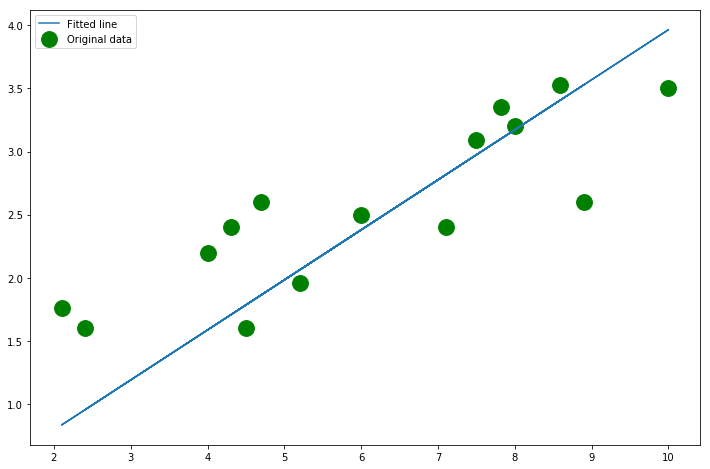

In [81]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend()

plt.show()